In [46]:
import genemunge
import json
import matplotlib
import seaborn
import numpy
from matplotlib import pyplot as plt
%matplotlib inline

In [42]:
describer = genemunge.describe.Describer('ensembl_gene_id')
searcher = genemunge.search.Searcher()
hk_genes = searcher.get_housekeeping_genes()

In [45]:
means =  describer.tissue_stats['mean']
robust_stds = (describer.tissue_stats['upper_quartile'] - describer.tissue_stats['lower_quartile']) / 1.35

mean_across_tissues = describer.tissue_stats['mean'].mean(axis=1)
variance_across_tissues = describer.tissue_stats['mean'].var(axis=1)
variance_within_tissues = (describer.tissue_stats['std']**2).mean(axis=1)
total_variance = variance_across_tissues + variance_within_tissues
total_standard_deviation = numpy.sqrt(total_variance)
coefficient_of_variation = total_standard_deviation / mean_across_tissues

/home/charles/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


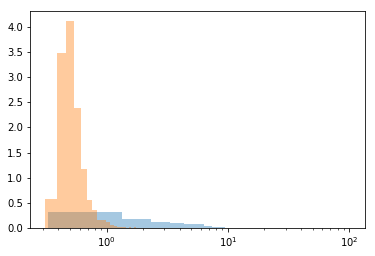

In [70]:
fig, ax = plt.subplots()
seaborn.distplot(coefficient_of_variation.loc[~coefficient_of_variation.index.isin(hk_genes)], ax=ax, kde=False, 
                 bins=100, norm_hist=True)
seaborn.distplot(coefficient_of_variation.loc[hk_genes], ax=ax, kde=False, bins=100, norm_hist=True)
ax.set_xscale('log')

In [90]:
coefficient_of_variation.loc[hk_genes].sort_values()
coefficient_of_variation.loc[~coefficient_of_variation.index.isin(hk_genes)].sort_values()

ENSG00000268083      0.331478
ENSG00000254873      0.332819
ENSG00000267059      0.334821
ENSG00000230532      0.348216
ENSG00000135637      0.352355
ENSG00000256950      0.357707
ENSG00000167699      0.359863
ENSG00000259972      0.361009
ENSG00000254452      0.362444
ENSG00000105341      0.364169
ENSG00000269307      0.364858
ENSG00000270617      0.368158
ENSG00000135390      0.368663
ENSG00000272182      0.370738
ENSG00000255339      0.371112
ENSG00000123144      0.371917
ENSG00000245156      0.372027
ENSG00000179818      0.372043
ENSG00000232388      0.374920
ENSG00000215375      0.374973
ENSG00000100220      0.376310
ENSG00000101844      0.377267
ENSG00000236810      0.377874
ENSG00000142444      0.378174
ENSG00000175826      0.379208
ENSG00000137038      0.379432
ENSG00000267740      0.380217
ENSG00000226970      0.380747
ENSG00000214046      0.382364
ENSG00000250317      0.383694
                      ...    
ENSG00000184502     39.663831
ENSG00000212657     39.814591
ENSG000002

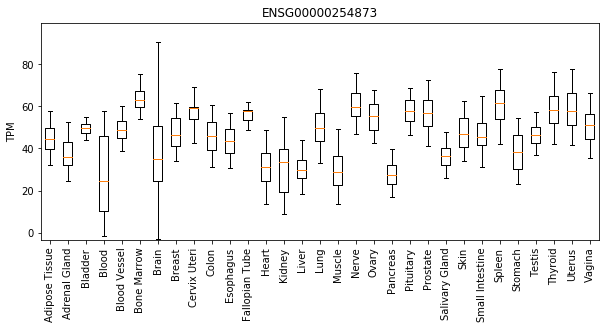

In [92]:
describer.plot_tissue_expression('ENSG00000254873')

In [93]:
describer.get_gene_info('ENSG00000254873')

{'ensembl': 'ENSG00000254873', 'name': nan, 'ontology': {}, 'symbol': nan}